In [3]:
import pandas as pd

In [5]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,order
0,1,5.1,3.5,1.4,0.2,Virginica,1
1,2,4.9,3.0,1.4,0.2,Virginica,2
2,3,4.7,NaN,1.3,0.2,Virginica,3
3,4,4.6,3.1,1.5,0.2,Virginica,1
4,5,5.0,3.6,1.4,0.2,Virginica,2


In [7]:
df.isna().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     0
Species          0
order            0
dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,recall_score,ConfusionMatrixDisplay

In [5]:
labelencoder = LabelEncoder()
df['Species'] = labelencoder.fit_transform(df['Species'])

In [6]:
x = df.drop(columns=['Species'])
y = df['Species']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [8]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [9]:
predicted = model.predict(x_test)
predicted

array([1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2,
       1, 2, 2, 0, 2, 0, 1, 1])

In [10]:
precision_score(y_test, predicted, average='micro')

1.0

In [11]:
recall_score(y_test, predicted, average='macro')

1.0

In [12]:
accuracy_score(y_test, predicted)

1.0

In [13]:
cm = confusion_matrix(y_test, predicted)
cm

array([[ 7,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 10]], dtype=int64)

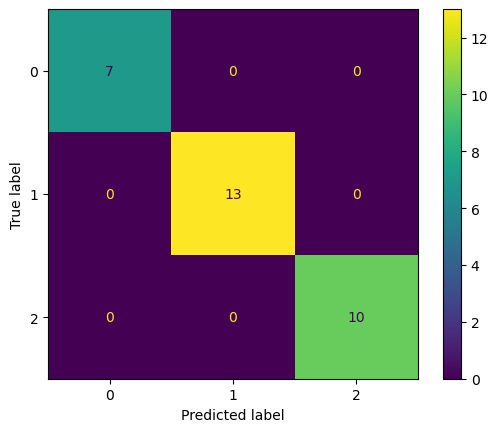

In [14]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()